In [1]:
# from couplevae import *
import scanpy as sc
# 环境配置与包导入
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use('Agg')  # 如果你在 Notebook 中想显示图，可以注释掉这一行
from scipy.sparse import issparse
from scipy import sparse
from adjustText import adjust_text
from couplevae import *
# from couplevae import *  # 确保你已经正确安装了 couplevae


In [2]:
# 路径与参数设置
train_path = "F:\研0\新论文\构建单细胞因果推断模型\CoupleVAE-master\data\\train\\train_hpoly.h5ad"
valid_path = "F:\研0\新论文\构建单细胞因果推断模型\CoupleVAE-master\data\\valid\\valid_hpoly.h5ad"
test_path = "F:\研0\新论文\构建单细胞因果推断模型\CoupleVAE-master\data\\test\\test_hpoly.h5ad"

In [3]:
# 加载 AnnData 数据
train = sc.read(train_path)
valid = sc.read(valid_path)
test = sc.read(test_path)

d:\anaconda\envs\couplevae_env\Lib\site-packages\anndata\compat\__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
d:\anaconda\envs\couplevae_env\Lib\site-packages\anndata\compat\__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [4]:
train.obs["cell_label_all"] = "all"
valid.obs["cell_label_all"] = "all"
test.obs["cell_label_all"] = "all"

In [5]:
train.obs['condition']

index
B8_TTGGGAACGGGCAA_Hpoly.Day10_Enterocyte-1           Hpoly.Day10
B1_TTCATGACGGTACT_Control_Stem-0                         Control
B4_CGAGCGTGTACTGG_Control_Enterocyte.Progenitor-0        Control
B7_TAATCGCTGCTACA_Hpoly.Day10_Stem-1                 Hpoly.Day10
B4_ACTGCCTGAGTTCG_Control_Enterocyte.Progenitor-0        Control
                                                        ...     
B3_TTCTACGATTGCAG_Control_Enterocyte.Progenitor-0        Control
B3_GCGGCAACCTCCAC_Control_TA.Early-0                     Control
B7_ATTATGGAGTTTCT_Hpoly.Day10_Tuft-1                 Hpoly.Day10
B8_GATATCCTTGTAGC_Hpoly.Day10_Goblet-1               Hpoly.Day10
B7_AGCATGACCTAGTG_Hpoly.Day10_Stem-1                 Hpoly.Day10
Name: condition, Length: 1821, dtype: category
Categories (2, object): ['Control', 'Hpoly.Day10']

In [6]:
train.obs['cell_label']

index
B8_TTGGGAACGGGCAA_Hpoly.Day10_Enterocyte-1                      Enterocyte
B1_TTCATGACGGTACT_Control_Stem-0                                      Stem
B4_CGAGCGTGTACTGG_Control_Enterocyte.Progenitor-0    Enterocyte.Progenitor
B7_TAATCGCTGCTACA_Hpoly.Day10_Stem-1                                  Stem
B4_ACTGCCTGAGTTCG_Control_Enterocyte.Progenitor-0    Enterocyte.Progenitor
                                                             ...          
B3_TTCTACGATTGCAG_Control_Enterocyte.Progenitor-0    Enterocyte.Progenitor
B3_GCGGCAACCTCCAC_Control_TA.Early-0                              TA.Early
B7_ATTATGGAGTTTCT_Hpoly.Day10_Tuft-1                                  Tuft
B8_GATATCCTTGTAGC_Hpoly.Day10_Goblet-1                              Goblet
B7_AGCATGACCTAGTG_Hpoly.Day10_Stem-1                                  Stem
Name: cell_label, Length: 1821, dtype: category
Categories (8, object): ['Endocrine', 'Enterocyte', 'Enterocyte.Progenitor', 'Goblet', 'Stem', 'TA', 'TA.Early', 'Tuft']

In [7]:
test.obs["cell_label_all"]

index
B4_CCGACACTAAGCCT_Control_TA-0                           all
B3_CCACTTCTCGAGTT_Control_Tuft-0                         all
B3_ACGATGACCACAAC_Control_Goblet-0                       all
B3_ACGTCGCTACACTG_Control_Stem-0                         all
B4_AGGACTTGGCAAGG_Control_TA-0                           all
                                                        ... 
B3_GACTCCTGTTCCCG_Control_TA-0                           all
B3_GTTGAGTGCAAAGA_Control_TA.Early-0                     all
B7_GGAACTACACACTG_Hpoly.Day10_Enterocyte.Progenitor-1    all
B1_CGGATATGTCGTTT_Control_Stem-0                         all
B7_CTGCGACTCCGTTC_Hpoly.Day10_TA.Early-1                 all
Name: cell_label_all, Length: 1214, dtype: object

In [8]:
data_name = "hpoly"
cell_type = "all"
condition_key = "condition"
cell_type_key = "cell_label_all"
pert_key = "Hpoly.Day10"
ctrl_key = "Control"
device = "cuda"  # 如果没有 GPU 可以设置为 "cpu"

In [9]:
train.obs['condition']

index
B8_TTGGGAACGGGCAA_Hpoly.Day10_Enterocyte-1           Hpoly.Day10
B1_TTCATGACGGTACT_Control_Stem-0                         Control
B4_CGAGCGTGTACTGG_Control_Enterocyte.Progenitor-0        Control
B7_TAATCGCTGCTACA_Hpoly.Day10_Stem-1                 Hpoly.Day10
B4_ACTGCCTGAGTTCG_Control_Enterocyte.Progenitor-0        Control
                                                        ...     
B3_TTCTACGATTGCAG_Control_Enterocyte.Progenitor-0        Control
B3_GCGGCAACCTCCAC_Control_TA.Early-0                     Control
B7_ATTATGGAGTTTCT_Hpoly.Day10_Tuft-1                 Hpoly.Day10
B8_GATATCCTTGTAGC_Hpoly.Day10_Goblet-1               Hpoly.Day10
B7_AGCATGACCTAGTG_Hpoly.Day10_Stem-1                 Hpoly.Day10
Name: condition, Length: 1821, dtype: category
Categories (2, object): ['Control', 'Hpoly.Day10']

In [10]:
trainloader = load_h5ad_to_dataloader(train, condition_key, cell_type_key, 
                                       cell_type, ctrl_key, pert_key, device)
validloader = load_h5ad_to_dataloader(valid, condition_key, cell_type_key, 
                                       cell_type, ctrl_key, pert_key, device)

# test_adata_c = test[(test.obs[condition_key]==ctrl_key)&(test.obs[cell_type_key]==cell_type)]  
# test_adata_p = test[(test.obs[condition_key]==pert_key)&(test.obs[cell_type_key]==cell_type)]

# test_adata_c = train[(train.obs[condition_key] == ctrl_key) & (train.obs[cell_type_key] == cell_type)]
# test_adata_p = train[(train.obs[condition_key] == pert_key) & (train.obs[cell_type_key] == cell_type)]



In [11]:
len(trainloader)

52

In [12]:
network = VAE(x_dim=train.X.shape[1],
              z_dim=200,
              alpha=0.00005,
              beta=0.05,
              dropout_rate=0.1,
              learning_rate=0.0001)

trainer = Trainer(model=network, learning_rate=0.0005, n_epochs=200, patience=20, batch_size=128)

# 训练模型
trainer.train(train_loader=trainloader, valid_loader=validloader)


d:\anaconda\envs\couplevae_env\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
d:\anaconda\envs\couplevae_env\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch 1, Train Loss: 627.8458, Validation Loss: 555.7328
Epoch 2, Train Loss: 526.9819, Validation Loss: 520.5179
Epoch 3, Train Loss: 503.3016, Validation Loss: 501.2924
Epoch 4, Train Loss: 491.0749, Validation Loss: 487.9850
Epoch 5, Train Loss: 481.8011, Validation Loss: 479.7509
Epoch 6, Train Loss: 475.5903, Validation Loss: 476.6824
Epoch 7, Train Loss: 472.7548, Validation Loss: 474.3277
Epoch 8, Train Loss: 468.2985, Validation Loss: 471.6124
Epoch 9, Train Loss: 463.4008, Validation Loss: 467.1777
Epoch 10, Train Loss: 457.8217, Validation Loss: 464.9417
Epoch 11, Train Loss: 453.1108, Validation Loss: 459.3848
Epoch 12, Train Loss: 451.1639, Validation Loss: 458.7833
Epoch 13, Train Loss: 448.0859, Validation Loss: 457.4572
Epoch 14, Train Loss: 443.5127, Validation Loss: 453.9099
Epoch 15, Train Loss: 441.8720, Validation Loss: 456.2076
Epoch 16, Train Loss: 440.6387, Validation Loss: 465.4628
Epoch 17, Train Loss: 439.6394, Validation Loss: 456.4116
Epoch 18, Train Loss: 4

In [13]:
adata_combined = train.concatenate(test, valid, join='outer', batch_key='study')
test=adata_combined

C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_9880\3545487981.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = train.concatenate(test, valid, join='outer', batch_key='study')


In [14]:
test_adata_c = test[(test.obs[condition_key]==ctrl_key)&(test.obs[cell_type_key]==cell_type)]  
test_adata_p = test[(test.obs[condition_key]==pert_key)&(test.obs[cell_type_key]==cell_type)]

In [15]:
pred = network.predict(test_adata_c, test_adata_p)

# 包装为 AnnData
pred_adata = anndata.AnnData(pred, 
                             obs={condition_key: [f"{cell_type}_pred_pert"] * len(pred),
                                  cell_type_key: [cell_type] * len(pred)},
                             var={"var_names": test_adata_c.var_names})

if sparse.issparse(test_adata_c.X):
    test_adata_c.X = test_adata_c.X.A
ctrl_adata = anndata.AnnData(test_adata_c.X,
                             obs={condition_key: [f"{cell_type}_ctrl"] * len(test_adata_c),
                                  cell_type_key: [cell_type] * len(test_adata_c)},
                             var={"var_names": test_adata_c.var_names})

if sparse.issparse(test_adata_p.X):
    test_adata_p.X = test_adata_p.X.A
real_stim_adata = anndata.AnnData(test_adata_p.X,
                                  obs={condition_key: [f"{cell_type}_real_pert"] * len(test_adata_p),
                                       cell_type_key: [cell_type] * len(test_adata_p)},
                                  var={"var_names": test_adata_p.var_names})
# print(ctrl_adata.shape)
# print(pred_adata.shape)
# print(real_stim_adata.shape)
# print(all_data.shape)

# 合并结果保存
all_data = ctrl_adata.concatenate(pred_adata, real_stim_adata)
all_data.write_h5ad(f"hpoly_result\coupleVAE{data_name}_{cell_type}.h5ad")


C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_9880\3205295679.py:28: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  all_data = ctrl_adata.concatenate(pred_adata, real_stim_adata)


In [16]:
# def plot_gene_correlation(data, cond_col, axes_map, label_map, file_path='./output_plot.pdf', 
#                           genes_of_interest=None, top_genes=None, show_plot=False, include_legend=True, 
#                           plot_title='', x_offset=0.3, y_offset=0.8, text_size=14):
#     if genes_of_interest is None:
#         genes_of_interest = []
#     if top_genes is None:
#         top_genes = []

#     if issparse(data.X):
#         data.X = data.X.toarray()

#     group_y = data[data.obs[cond_col] == axes_map['y'], :]
#     group_x = data[data.obs[cond_col] == axes_map['x'], :]

#     if len(top_genes) > 0:
#         subset_data_x = group_x[:, top_genes].X
#         subset_data_y = group_y[:, top_genes].X
#         avg_x_genes = np.mean(subset_data_x, axis=0)
#         avg_y_genes = np.mean(subset_data_y, axis=0)
#         r_squared_top = np.corrcoef(avg_x_genes, avg_y_genes)[0, 1] ** 2
#         print(f'R-squared for top genes: {r_squared_top:.2f}')

#     avg_x = np.mean(group_x.X, axis=0)
#     avg_y = np.mean(group_y.X, axis=0)
#         # 💡 新增调试信息：
#     print("✅ avg_x[:5] =", avg_x[:5])
#     print("✅ avg_y[:5] =", avg_y[:5])
#     print("✅ 是否完全一致:", np.allclose(avg_x, avg_y))
#     print("✅ R² =", np.corrcoef(avg_x, avg_y)[0, 1] ** 2)
    
#     r_squared_all = np.corrcoef(avg_x, avg_y)[0, 1] ** 2
#     print(f'R-squared for all genes: {r_squared_all:.2f}')

#     df = pd.DataFrame({label_map['x']: avg_x, label_map['y']: avg_y})
#     plt.figure()
#     ax = sns.regplot(x=label_map['x'], y=label_map['y'], data=df, scatter_kws={'s': 10}, line_kws={'color': 'green'})
#     plt.xlabel(label_map['x'], fontsize=text_size)
#     plt.ylabel(label_map['y'], fontsize=text_size)

#     if plot_title:
#         plt.title(plot_title, fontsize=text_size)

#     if len(genes_of_interest) > 0:
#         texts = []
#         for gene in genes_of_interest:
#             gene_idx = np.where(data.var_names == gene)[0][0]
#             x_pos = avg_x[gene_idx]
#             y_pos = avg_y[gene_idx]
#             texts.append(plt.text(x_pos, y_pos, gene, fontsize=10, color='black'))
#             plt.scatter(x_pos, y_pos, color='red', s=40)
#         adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=0.5))

#     plt.text(max(avg_x) - max(avg_x) * x_offset, max(avg_y) - y_offset * max(avg_y),
#              r'$\mathrm{R^2_{\mathrm{\mathsf{all\ genes}}}}$='+ f"{r_squared_all:.2f}", fontsize=text_size)

#     if len(top_genes) > 0:
#         plt.text(max(avg_x) - max(avg_x) * x_offset, max(avg_y) - (y_offset + 0.15) * max(avg_y),
#                 r'$\mathrm{R^2_{\mathrm{\mathsf{top\ 100\ DEGs}}}}$='+ f"{r_squared_top:.2f}", fontsize=text_size)

#     if include_legend:
#         plt.legend(loc='best')

#     plt.savefig(file_path, bbox_inches='tight', dpi=300)
#     if show_plot:
#         plt.show()
#     plt.close()


In [18]:
# result1 = sc.read(f"./coupleVAE{data_name}_{cell_type}.h5ad")
result1 = all_data
result1.obs

,condition,cell_label_all,batch
0-0,all_ctrl,all,0
1-0,all_ctrl,all,0
2-0,all_ctrl,all,0
3-0,all_ctrl,all,0
4-0,all_ctrl,all,0
...,...,...,...
1795-2,all_real_pert,all,2
1796-2,all_real_pert,all,2
1797-2,all_real_pert,all,2
1798-2,all_real_pert,all,2


In [19]:
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_violin_compare_pert(adata,
                              genes,
                              condition_key='condition',
                              ctrl_label='CD4T_ctrl',
                              real_label='CD4T_real_pert',
                              pred_label='CD4T_pred_pert',
                              cell_type='CD4T',
                              save_path=None,
                              show=True,
                              return_figs=False,
                              figsize=(4, 3),
                              fontsize=12):
    """
    绘制小提琴图，对比 ctrl、真实扰动和预测扰动的表达分布，并显示散点。
    """
    # 筛选三类条件
    valid_labels = [ctrl_label, pred_label, real_label]
    subset = adata[adata.obs[condition_key].isin(valid_labels)]

    figs = []
    for gene in genes:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])
        
        sc.pl.violin(subset,
                     keys=gene,
                     groupby=condition_key,
                     ax=ax,
                     stripplot=True,    # 显示散点
                     jitter=True,       # 增加抖动
                     show=False)
        
        ax.set_title(f'Expression of {gene} in {cell_type}', fontsize=fontsize)
        ax.set_ylabel("Expression", fontsize=fontsize)
        ax.set_xlabel("Condition", fontsize=fontsize)
        ax.tick_params(labelsize=fontsize - 2)
        figs.append(fig)

    # 保存 PDF
    if save_path:
        with PdfPages(save_path) as pdf:
            for fig in figs:
                pdf.savefig(fig, bbox_inches='tight', dpi=300)
                plt.close(fig)

    # 显示
    if show:
        for fig in figs:
            fig.show()

    # 返回对象
    if return_figs:
        return figs


In [20]:
def plot_gene_correlation(data, cond_col, axes_map, label_map, file_path='./output_plot.pdf', 
                          genes_of_interest=None, top_genes=None, show_plot=False, include_legend=True, 
                          plot_title='', x_offset=0.05, y_offset=0.95, text_size=14, reg_type='mean'):
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from adjustText import adjust_text
    from scipy.sparse import issparse

    sns.set(style="white", context="notebook")  # 或 'talk', 'paper'
    plt.rcParams['axes.linewidth'] = 1.2  # 坐标轴线宽
    plt.rcParams['xtick.major.width'] = 1.2
    plt.rcParams['ytick.major.width'] = 1.2

    if genes_of_interest is None:
        genes_of_interest = []
    if top_genes is None:
        top_genes = []

    if issparse(data.X):
        data.X = data.X.toarray()

    group_y = data[data.obs[cond_col] == axes_map['y'], :]
    group_x = data[data.obs[cond_col] == axes_map['x'], :]

    # 选择均值或方差
    if reg_type == 'mean':
        avg_func = np.mean
    elif reg_type == 'var':
        avg_func = np.var
    else:
        raise ValueError("reg_type must be 'mean' or 'var'")

    r_squared_top = None
    if len(top_genes) > 0:
        subset_data_x = group_x[:, top_genes].X
        subset_data_y = group_y[:, top_genes].X
        avg_x_genes = avg_func(subset_data_x, axis=0)
        avg_y_genes = avg_func(subset_data_y, axis=0)
        r_squared_top = np.corrcoef(avg_x_genes, avg_y_genes)[0, 1] ** 2
        print(f'R-squared for top genes: {r_squared_top:.2f}')

    avg_x = avg_func(group_x.X, axis=0)
    avg_y = avg_func(group_y.X, axis=0)
    r_squared_all = np.corrcoef(avg_x, avg_y)[0, 1] ** 2
    print(f'R-squared for all genes: {r_squared_all:.2f}')

    df = pd.DataFrame({label_map['x']: avg_x, label_map['y']: avg_y})

    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(4, 4))

    sns.regplot(x=label_map['x'], y=label_map['y'], data=df,
                scatter_kws={'s': 60, 'alpha': 0.5},
                line_kws={'color': 'green'}, ax=ax)

    ax.set_xlabel(label_map['x'], fontsize=text_size)
    ax.set_ylabel(label_map['y'], fontsize=text_size)
    ax.grid(False)

    if plot_title:
        ax.set_title(plot_title, fontsize=text_size)

    # 标注基因
    texts = []
    for gene in genes_of_interest[:10]:
        if gene in data.var_names:
            gene_idx = np.where(data.var_names == gene)[0][0]
            x_pos = avg_x[gene_idx]
            y_pos = avg_y[gene_idx]
            texts.append(ax.text(x_pos, y_pos, gene, fontsize=10, color='black'))
            ax.scatter(x_pos, y_pos, color='red', s=60, zorder=3)
    if texts:
        adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.6))

    # 使用 ax.transAxes 保证一致位置
    ax.text(x_offset, y_offset,
            r'$R^2_{\mathrm{all\ genes}}$' + f" = {r_squared_all:.2f}",
            transform=ax.transAxes, fontsize=text_size)

    if r_squared_top is not None:
        ax.text(x_offset, y_offset - 0.1,
                r'$R^2_{\mathrm{top\ 100\ DEGs}}$' + f" = {r_squared_top:.2f}",
                transform=ax.transAxes, fontsize=text_size)

    if include_legend:
        ax.legend(loc='best')

    plt.tight_layout()
    if file_path:
        plt.savefig(file_path, bbox_inches='tight', dpi=300)
    if show_plot:
        plt.show()
    plt.close()


R-squared for top genes: 0.99
R-squared for all genes: 0.98


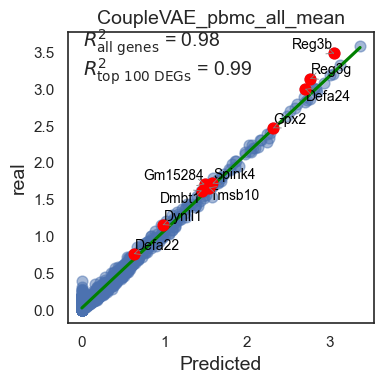

R-squared for top genes: 0.96
R-squared for all genes: 0.84


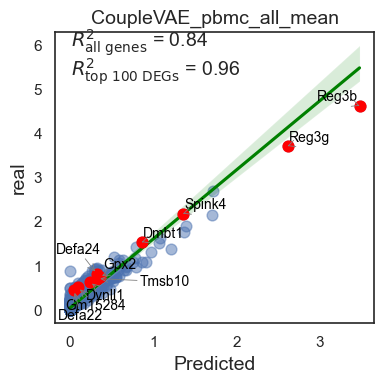

In [22]:
%matplotlib inline
# result = sc.read(f"./coupleVAE{data_name}_{cell_type}.h5ad")
result = result1

sc.tl.rank_genes_groups(result, groupby="condition", n_genes=100, method="wilcoxon")

diff_genes_covid = result.uns["rank_genes_groups"]["names"][f"{cell_type}_real_pert"]

conditions = {
    "ctrl": f"{cell_type}_ctrl",
    "pred_stim": f"{cell_type}_pred_pert",
    "real_stim": f"{cell_type}_real_pert"
}
plot_gene_correlation(data=result,
                      cond_col="condition",
                      axes_map={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                      label_map={"x": "Predicted", "y": "real"},
                      genes_of_interest=diff_genes_covid[:10],
                      top_genes=diff_genes_covid,
                      reg_type='mean',  # 或 'var'
                      plot_title=f"CoupleVAE_pbmc_{cell_type}_mean",
                      show_plot=True,
                    #   fontsize=12,
                      include_legend=False)
plot_gene_correlation(data=result,
                      cond_col="condition",
                      axes_map={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                      label_map={"x": "Predicted", "y": "real"},
                      genes_of_interest=diff_genes_covid[:10],
                      top_genes=diff_genes_covid,
                      reg_type='var',  # 或 'var'
                      plot_title=f"CoupleVAE_pbmc_{cell_type}_mean",
                      show_plot=True,
                    #   fontsize=12,
                      include_legend=False)

In [ ]:
result

AnnData object with n_obs × n_vars = 221 × 7000
    obs: 'condition', 'cell_label', 'batch'
    uns: 'rank_genes_groups'

In [ ]:
# sc.pp.normalize_total(result, target_sum=1e4)
# sc.pp.log1p(result)
# sc.pp.highly_variable_genes(result, n_top_genes=2000)
# result = result[:, result.var.highly_variable]
# sc.pp.scale(result)
# sc.tl.pca(result)


In [ ]:
# print(result.shape)
# print(result.obs["condition"].value_counts())
# sc.pl.pca(result, color="condition", size=10)


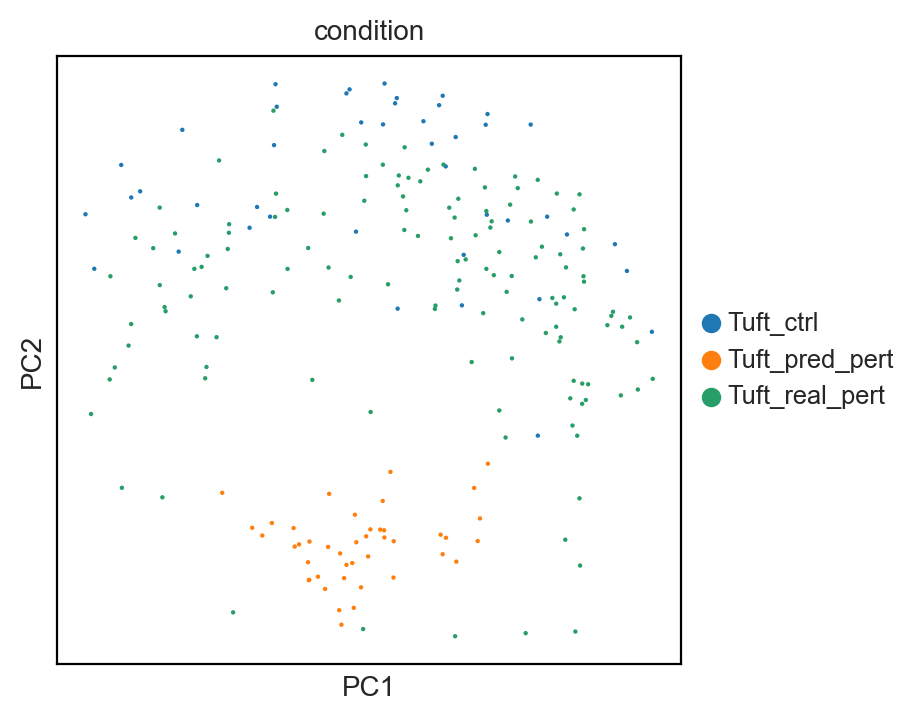

d:\anaconda\envs\couplevae_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


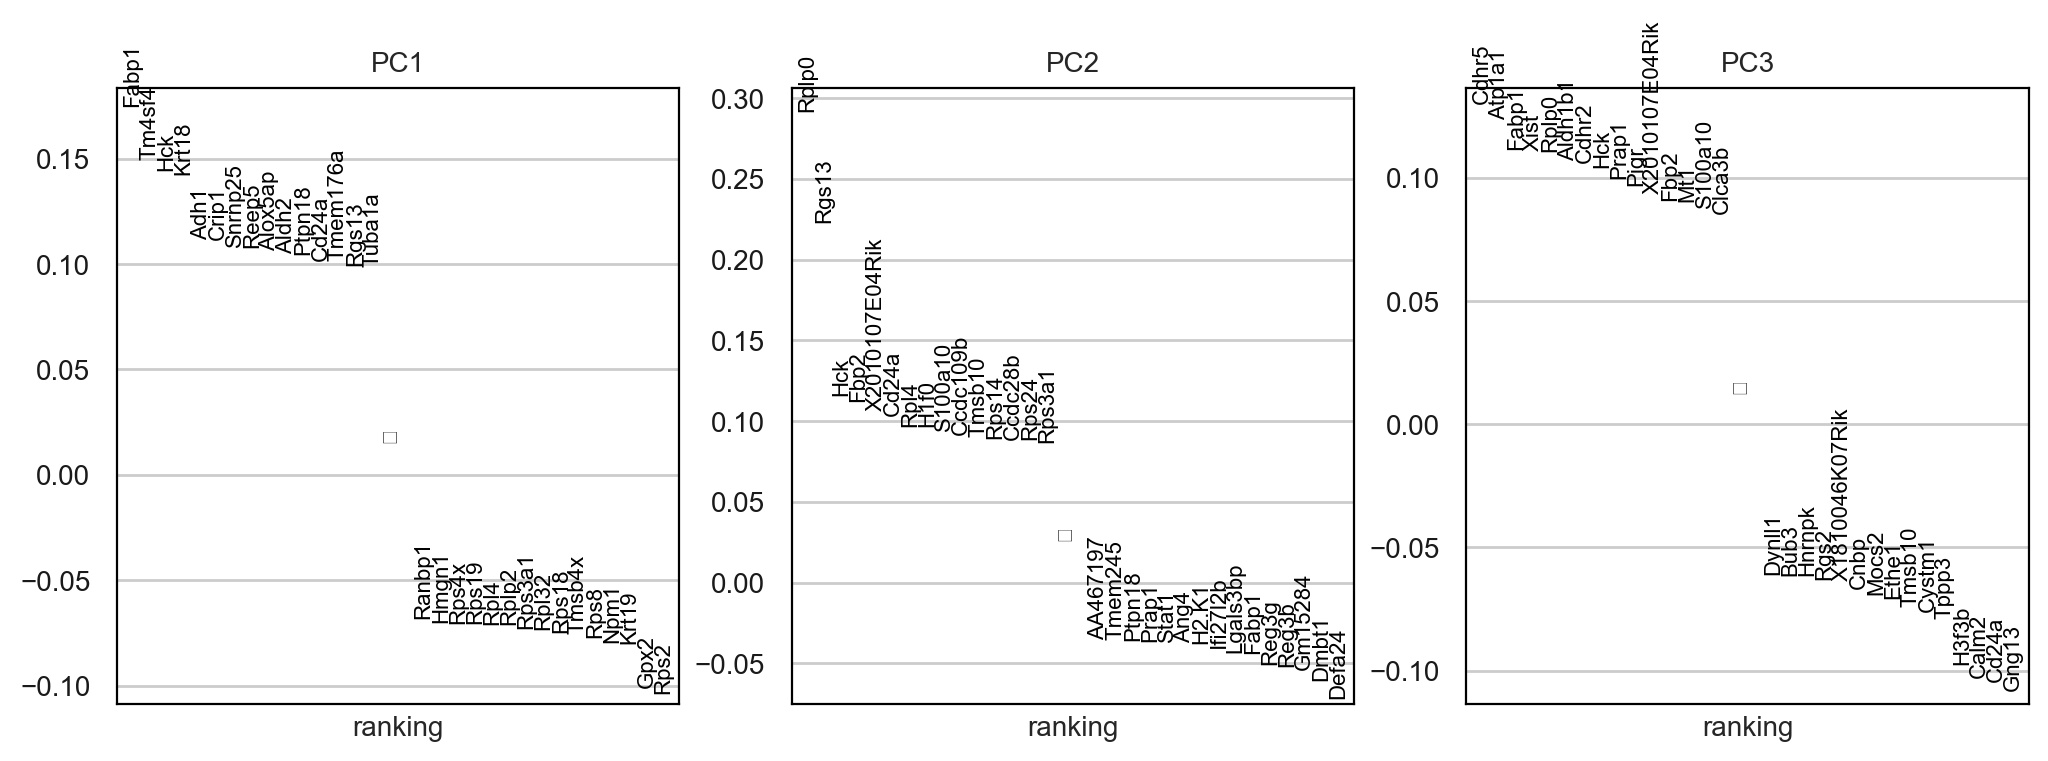

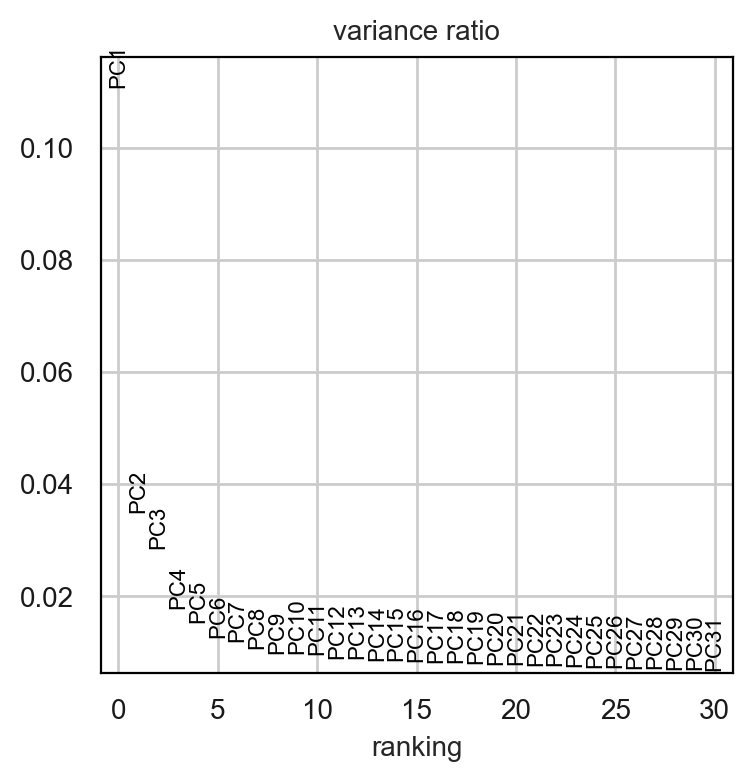

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
%matplotlib inline

# 设置图像大小、字体等参数（全局控制）
sc.set_figure_params(figsize=(4, 4), dpi=100, fontsize=10)

# 运行 PCA
sc.tl.pca(result)

# 绘制 PCA 概览图
sc.pl.pca_overview(
    result,
    color="condition",
    ncols=2,
    size=10,
    show=True
)


In [ ]:
result

AnnData object with n_obs × n_vars = 221 × 7000
    obs: 'condition', 'cell_label', 'batch'
    uns: 'rank_genes_groups', 'pca', 'condition_colors'
    obsm: 'X_pca'
    varm: 'PCs'

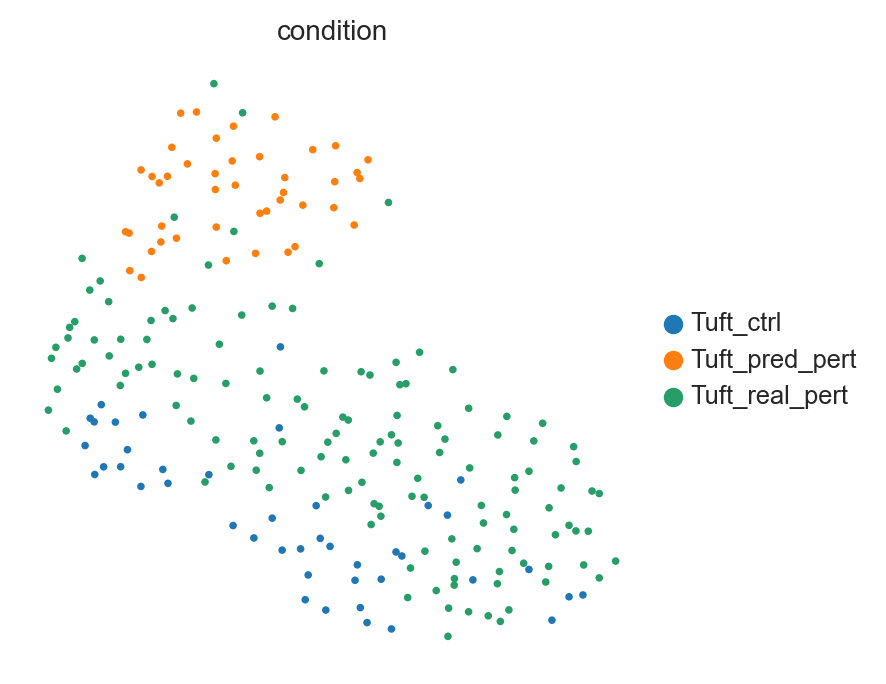

In [ ]:
sc.pp.neighbors(result,n_neighbors=50)
sc.tl.umap(result)

sc.pl.umap(result,
           color=['condition'],
           frameon=False,
           wspace=0.3,
           size=30)

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.pl.umap(adata,
           color=['condition'],
           frameon=False,
           wspace=0.3)

NameError: name 'adata' is not defined

In [ ]:



pred = network.predict(test_adata_c, test_adata_p)

# 包装为 AnnData
pred_adata = anndata.AnnData(pred, 
                             obs={condition_key: [f"{cell_type}_pred_pert"] * len(pred),
                                  cell_type_key: [cell_type] * len(pred)},
                             var={"var_names": test_adata_c.var_names})

if sparse.issparse(test_adata_c.X):
    test_adata_c.X = test_adata_c.X.A
ctrl_adata = anndata.AnnData(test_adata_c.X,
                             obs={condition_key: [f"{cell_type}_ctrl"] * len(test_adata_c),
                                  cell_type_key: [cell_type] * len(test_adata_c)},
                             var={"var_names": test_adata_c.var_names})

if sparse.issparse(test_adata_p.X):
    test_adata_p.X = test_adata_p.X.A
real_stim_adata = anndata.AnnData(test_adata_p.X,
                                  obs={condition_key: [f"{cell_type}_real_pert"] * len(test_adata_p),
                                       cell_type_key: [cell_type] * len(test_adata_p)},
                                  var={"var_names": test_adata_p.var_names})
print(ctrl_adata.shape)
print(pred_adata.shape)
print(real_stim_adata.shape)
print(all_data.shape)

# 合并结果保存
all_data = ctrl_adata.concatenate(pred_adata, real_stim_adata)
all_data.write_h5ad(f"./coupleVAE{data_name}_{cell_type}.h5ad")


(670, 7000)
(592, 7000)
(592, 7000)
(1854, 7000)


/tmp/ipykernel_747304/2235327563.py:28: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  all_data = ctrl_adata.concatenate(pred_adata, real_stim_adata)


In [ ]:
# import scanpy as sc
# import anndata
# from scipy import sparse

# # 路径与参数设置
# train_path = "/data/CoupleVAE-master/data/train_split.h5ad"
# valid_path = "/data/CoupleVAE-master/data/valid_split.h5ad"
# test_path = "/data/CoupleVAE-master/data/valid_hpoly.h5ad"

# data_name = "hpoly"
# condition_key = "condition"
# cell_type_key = "cell_label"
# pert_key = "Hpoly.Day10"
# ctrl_key = "Control"
# device = "cuda"  # 可设为 "cpu"

# # 加载数据
# train = sc.read(train_path)
# valid = sc.read(valid_path)
# test = sc.read(test_path)

# # 提取所有 cell type
# all_cell_types = train.obs[cell_type_key].unique().tolist()

# # 准备容器用于拼接所有 AnnData
# all_results = []

# for cell_type in all_cell_types:
#     print(f"\n▶ 当前细胞类型: {cell_type}")

#     try:
#         # 构建 dataloader
#         trainloader = load_h5ad_to_dataloader(train, condition_key, cell_type_key, 
#                                                cell_type, ctrl_key, pert_key, device)
#         validloader = load_h5ad_to_dataloader(valid, condition_key, cell_type_key, 
#                                                cell_type, ctrl_key, pert_key, device)

#         # 准备测试数据
#         test_adata_c = test[(test.obs[condition_key]==ctrl_key)&(test.obs[cell_type_key]==cell_type)]  
#         test_adata_p = test[(test.obs[condition_key]==pert_key)&(test.obs[cell_type_key]==cell_type)]

#         if test_adata_c.shape[0] == 0 or test_adata_p.shape[0] == 0:
#             print(f"⚠️ {cell_type} 缺少测试数据，跳过")
#             continue

#         # 初始化模型
#         network = VAE(x_dim=train.X.shape[1],
#                       z_dim=200,
#                       alpha=0.00005,
#                       beta=0.05,
#                       dropout_rate=0.1,
#                       learning_rate=0.0001)

#         trainer = Trainer(model=network, learning_rate=0.0001, n_epochs=200, patience=20, batch_size=32)

#         # 训练模型
#         trainer.train(train_loader=trainloader, valid_loader=validloader)

#         # 预测
#         pred = network.predict(test_adata_c, test_adata_p)

#         # 构建 AnnData 格式
#         pred_adata = anndata.AnnData(pred, 
#                                      obs={condition_key: [f"{cell_type}_pred_pert"] * len(pred),
#                                           cell_type_key: [cell_type] * len(pred)},
#                                      var={"var_names": test_adata_c.var_names})

#         if sparse.issparse(test_adata_c.X):
#             test_adata_c.X = test_adata_c.X.A
#         ctrl_adata = anndata.AnnData(test_adata_c.X,
#                                      obs={condition_key: [f"{cell_type}_ctrl"] * len(test_adata_c),
#                                           cell_type_key: [cell_type] * len(test_adata_c)},
#                                      var={"var_names": test_adata_c.var_names})

#         if sparse.issparse(test_adata_p.X):
#             test_adata_p.X = test_adata_p.X.A
#         real_stim_adata = anndata.AnnData(test_adata_p.X,
#                                           obs={condition_key: [f"{cell_type}_real_pert"] * len(test_adata_p),
#                                                cell_type_key: [cell_type] * len(test_adata_p)},
#                                           var={"var_names": test_adata_p.var_names})

#         # 合并当前 cell type 的结果（单独保存）
#         cell_type_data = ctrl_adata.concatenate(pred_adata, real_stim_adata)
#         cell_type_data.write_h5ad(f"/data/CoupleVAE-master/data/coupleVAE_{data_name}_{cell_type}.h5ad")

#         # 加入总列表
#         all_results.append(cell_type_data)

#     except Exception as e:
#         print(f"❌ {cell_type} 处理失败: {e}")

# # 合并所有细胞类型的结果并保存
# if all_results:
#     merged_adata = anndata.concat(all_results, merge="same")
#     merged_adata.write_h5ad(f"/data/CoupleVAE-master/data/coupleVAE_{data_name}_ALL.h5ad")
#     print(f"\n✅ 所有细胞类型已完成合并并保存为 ./coupleVAE_{data_name}_ALL.h5ad")
# else:
#     print("❗ 没有成功合并的数据，可能所有 cell type 都跳过了")


In [ ]:
# # 统一三类标签（不区分细胞类型）
# result = sc.read("/data/CoupleVAE-master/data/coupleVAE_hpoly_ALL.h5ad")
# def simplify_condition(cond):
#     if cond.endswith("ctrl"):
#         return "ctrl"
#     elif cond.endswith("pred_pert"):
#         return "pred"
#     elif cond.endswith("real_pert"):
#         return "real"
#     else:
#         return "other"

# # 创建新列 unified_condition
# result.obs["unified_condition"] = result.obs["condition"].apply(simplify_condition)


In [ ]:
# # 
# sc.pp.neighbors(result)
# sc.tl.umap(result)

# sc.pl.umap(result,
#            color=['unified_condition'],
#            frameon=False,
#            wspace=0.9)

In [ ]:
from scipy.stats import wasserstein_distance, ks_2samp
import numpy as np

def get_gene_expr(adata, gene, condition, condition_key='condition'):
    gene_idx = adata.var_names.get_loc(gene)
    expr = adata[adata.obs[condition_key] == condition].X[:, gene_idx]
    return np.asarray(expr).ravel()

def compute_wasserstein(adata, gene, real_label, pred_label, condition_key='condition'):
    real_expr = get_gene_expr(adata, gene, real_label, condition_key)
    pred_expr = get_gene_expr(adata, gene, pred_label, condition_key)
    return wasserstein_distance(real_expr, pred_expr)

def compute_ks_test(adata, gene, real_label, pred_label, condition_key='condition'):
    real_expr = get_gene_expr(adata, gene, real_label, condition_key)
    pred_expr = get_gene_expr(adata, gene, pred_label, condition_key)
    D, pval = ks_2samp(real_expr, pred_expr)
    return D, pval

def compute_mean_var_diff(adata, gene, real_label, pred_label, condition_key='condition'):
    real = get_gene_expr(adata, gene, real_label, condition_key)
    pred = get_gene_expr(adata, gene, pred_label, condition_key)
    return {
        "mean_diff": abs(np.mean(real) - np.mean(pred)),
        "var_ratio": np.var(pred) / (np.var(real) + 1e-8)
    }


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_violin_compare_pert(adata,
                              genes,
                              condition_key='condition',
                              ctrl_label='Stem_ctrl',
                              real_label='Stem_real_pert',
                              pred_label='Stem_pred_pert',
                              cell_type='Stem',
                              save_path=None,
                              show=True,
                              return_figs=False,
                              figsize=(4, 3),
                              fontsize=12):
    """
    绘制小提琴图，对比 ctrl、真实扰动和预测扰动的表达分布，并显示散点。
    """
    # 筛选三类条件
    valid_labels = [ctrl_label, pred_label, real_label]
    subset = adata[adata.obs[condition_key].isin(valid_labels)]

    figs = []
    for gene in genes:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])
        
        sc.pl.violin(subset,
                     keys=gene,
                     groupby=condition_key,
                     ax=ax,
                     stripplot=True,    # 显示散点
                     jitter=True,       # 增加抖动
                     show=False)
        
        ax.set_title(f'Expression of {gene} in {cell_type}', fontsize=fontsize)
        ax.set_ylabel("Expression", fontsize=fontsize)
        ax.set_xlabel("Condition", fontsize=fontsize)
        ax.tick_params(labelsize=fontsize - 2)
        figs.append(fig)

    # 保存 PDF
    if save_path:
        with PdfPages(save_path) as pdf:
            for fig in figs:
                pdf.savefig(fig, bbox_inches='tight', dpi=300)
                plt.close(fig)

    # 显示
    if show:
        for fig in figs:
            fig.show()

    # 返回对象
    if return_figs:
        return figs


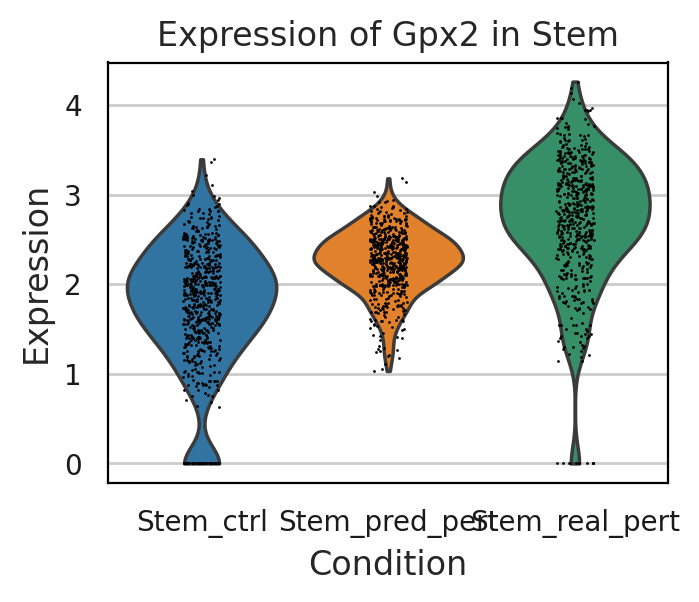

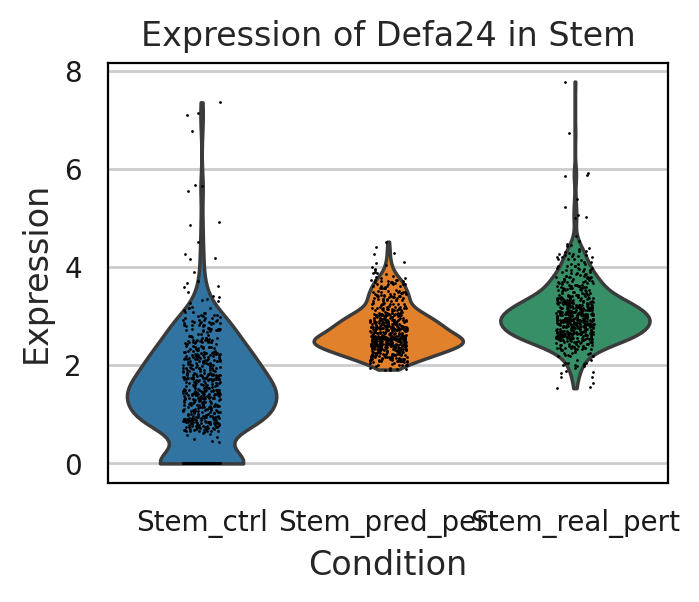

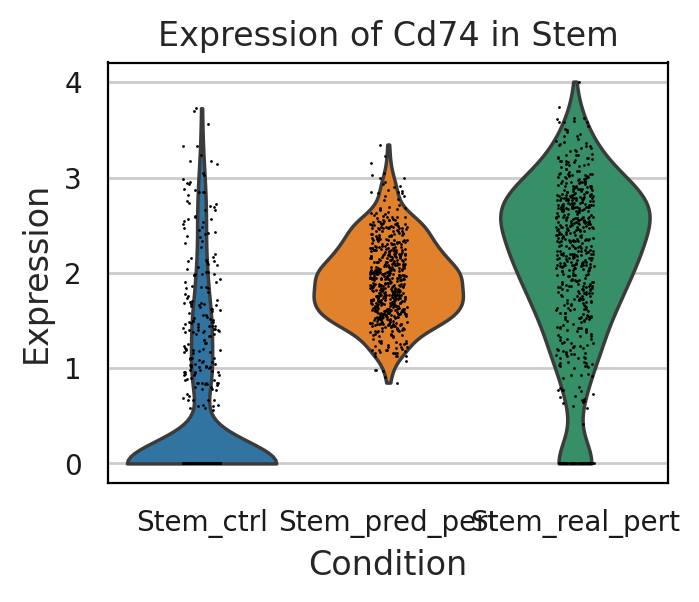

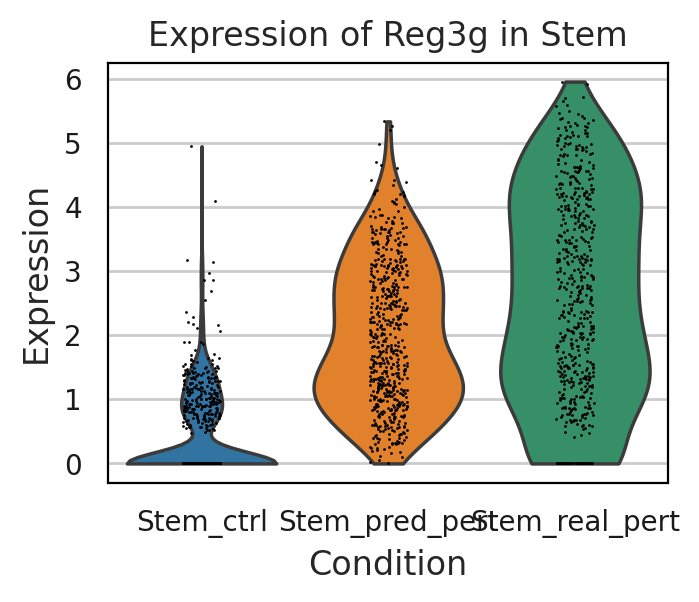

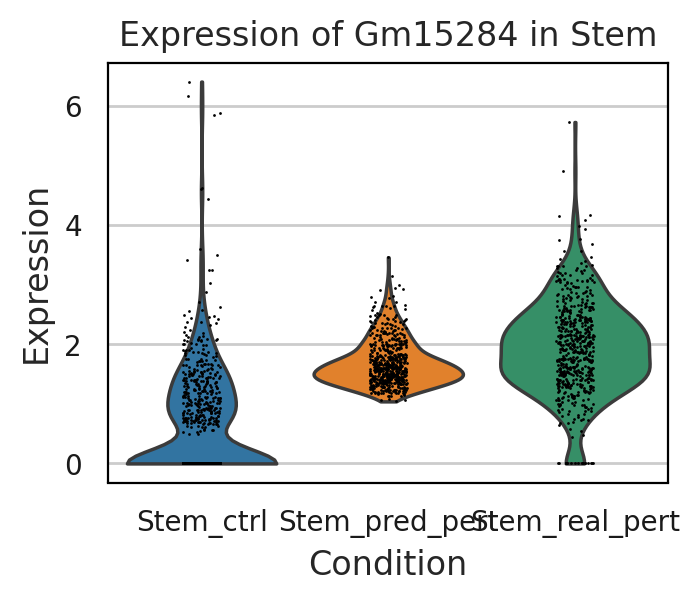

In [ ]:
plot_violin_compare_pert(result,
                         genes=diff_genes_covid[:5],
                              ctrl_label='Stem_ctrl',
                              real_label='Stem_real_pert',
                              pred_label='Stem_pred_pert',
                              cell_type='Stem',
                        #  save_path='./violin_compare_DEGs.pdf',
                         show=True)


In [ ]:
# 你的总数据，应该类似：
# all_data.obs['condition'] 中包含了 'ALL_real_pert' 和 'ALL_pred_pert'

adata_real = all_data[all_data.obs['condition'] == 'ALL_real_pert'].copy()
adata_pred = all_data[all_data.obs['condition'] == 'ALL_pred_pert'].copy()


In [ ]:
import numpy as np

y_true = adata_real.X.toarray() if hasattr(adata_real.X, "toarray") else adata_real.X
y_pred = adata_pred.X.toarray() if hasattr(adata_pred.X, "toarray") else adata_pred.X

y_true = np.asarray(y_true, dtype=np.float32)
y_pred = np.asarray(y_pred, dtype=np.float32)

# 保证维度匹配
print(y_true.shape, y_pred.shape)


(0, 7000) (0, 7000)


In [ ]:
from sklearn.metrics import r2_score
import pandas as pd

def analyze_gene_prediction_quality(y_true, y_pred, gene_names, save_prefix=None):
    r2_list = []
    pred_var = []
    true_var = []

    for i in range(y_true.shape[1]):
        yt = y_true[:, i]
        yp = y_pred[:, i]

        r2 = r2_score(yt, yp)
        r2_list.append(r2)
        pred_var.append(np.var(yp))
        true_var.append(np.var(yt))

    results_df = pd.DataFrame({
        "gene": gene_names,
        "r2": r2_list,
        "pred_var": pred_var,
        "true_var": true_var,
        "var_ratio": np.array(pred_var) / (np.array(true_var) + 1e-6),
    })

    if save_prefix:
        results_df.to_csv(f"{save_prefix}_gene_prediction_stats.csv", index=False)

    return results_df


In [ ]:
results_df = analyze_gene_prediction_quality(y_true, y_pred, adata_real.var_names)
results_df

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.